# Off-Platform Project: Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data we have available to us. We've imported the dataset and printed the following information:

* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

Some of these features are dictionaries. For example, the feature `"user"` is a dictionary. We might want to use some of the information found in these sub-dictionaries. Print `all_tweets.loc[0]["user"]` to see what the `"user"` feature looks like.


In [3]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]["user"])
print(all_tweets.loc[0]["user"]["location"])
print(all_tweets.loc[0]["user"]["screen_name"])

11099
Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_cou

# Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; we'll need to make it ourselves.

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. This can be found using the feature `"retweet_count"`. Let's say we wanted to create a column called `is_viral` that is a `1` if the tweet is more than the median of retweets and `0` otherwise.

In [4]:
import numpy as np
print(np.median(all_tweets["retweet_count"]))

13.0


In [6]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >13, 1, 0)
all_tweets['is_viral'].value_counts()

0    5562
1    5537
Name: is_viral, dtype: int64

In [9]:
print(all_tweets['is_viral'].iloc[:5])

0    0
1    0
2    0
3    1
4    0
Name: is_viral, dtype: int32


# Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features. Let's created 4 features : the length of a tweet, the number of followers, the number of friends, hashtag count.


In [10]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count']= all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count']= all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['hashtag_count']=all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)

# Normalizing The Data

We've now made the columns that we want to feed into our classifier. Let's get rid of all the data that is no longer relevant. Create a variable named `labels` and set it equal to the `'is_viral'` column of all_tweets.

Create a variable named `data` and set it equal to all of the columns that created in the last step. Those columns are `tweet_length`, `followers_count`, `friends_count`, and `hshtag count`

Since our features  are not in same scale, so we need to normalize the data

The scale function will normalize the data so all of the features will vary within the same range.


In [12]:
from sklearn.preprocessing import scale
labels=all_tweets['is_viral']
data=all_tweets[['tweet_length','followers_count','friends_count','hashtag_count']]
scaled_data=scale(data,axis=0)    # scale the data
print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305 -0.32045057]


# Creating the Training Set and Test Set

To evaluate the effectiveness of our classifier, we now split `scaled_data` and `labels` into a training set and test set using scikit-learn's `train_test_split` function. Set the optional parameter `test_size` to be `0.2`,`random_state = 1`. 

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels=train_test_split(scaled_data,labels,test_size=0.2,random_state=1)

# Using the Classifier

We can finally use the K-Nearest Neighbor classifier. Let's test it using `k = 5`. Begin by creating a `KNeighborsClassifier` object named `classifier` with the parameter `n_neighbors` equal to `5`.

Next, train `classifier` by calling the `.fit()` method with `train_data` and `train_labels` as parameters.

Finally, let's test the model! Call `classifier`'s `.score()` method using `test_data` and `test_labels` as parameters. Print the results.


In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data,train_labels)
print(classifier.score(test_data,test_labels))

0.5986486486486486


# Choosing K

We've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 

First, create an empty list called `scores`. Next, create a for loop that has a variable `k` that begins at `1` and ends at `200`.

Inside the for loop, create a `KNeighobrsClassifier` object named `classifier` with the parameter `n_neighbors` equal to `k`.

Train `classifier` by calling the `.fit()` method with `train_data` and `train_labels` as parameters.

Next, let's test the model! Call `classifier`'s `.score()` method using `test_data` and `test_labels` as parameters. `append` the result to `scores`.

Finally, let's plot the results. Outside of the loop, use Matplotlib's `plot()` function. `plot()` takes two parameters &mdash; the data on the x-axis and the data on the y-axis. Data on the x-axis should be the values we used for `k`. In this case, `range(1,200)`.  Data on the y-axis should be `scores`. 

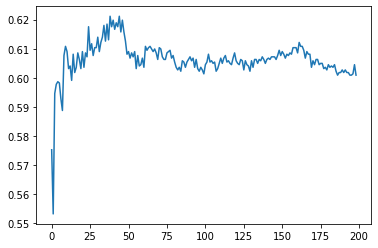

In [17]:
import matplotlib.pyplot as plt
score_rate=[]

for k in range (1,200):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data,train_labels)
    score_rate.append(classifier.score(test_data,test_labels))

plt.plot(score_rate)  

From the plot, we can see when k=35, score-rate achieve highest, after 40, the score rate decrease, the model overfitting.